## Initial data solver using relaxation

We try to solve the time symmetric initial data when given a $ρ$ field on a cube. 
We put Robin boudary conditions.

Thus we shall be solving:

$$
ψ_{tt} = \Delta ψ + ψ^5 ρ \;\;\;\; \vec{x}\cdot \nabla ψ + (1-ψ) = 0
$$

$$
\rho = |phi_t|^2 + V + \psi^{-4}|\nabla \psi|^2
$$

Using second order finite differences inside the domain and first order at the boudaries we get for the boundary values (which are not evolved):

For boundary conditions we shall put an outgoing wave, but taking into account that we want a radial wave and that something which at first order should be a monopolar field.

$$
ψ_t = (x^i\partial_i ψ - (ψ - ψ_0))/r
$$ 
Same for the time derivative, but that part should be unnessary becuse this should decay to a static solution.

The solution we are seeking is of the form of an outgoing wave plus a static solution, the one we are after. It well behave as a monopole at large distance, plus a constant.

$$
\psi(t,x) =\frac{f(t-r) + M}{r} + \psi_0
$$

Thus we have, 
$$
\partial_t \psi = \frac{f'(t-r)}{r}, \;\;\;\;\; \frac{\vec{x}\cdot \nabla \psi}{r} = -f'/r - f/r^2 - M/r^2 
$$

therefore asymtotically we should have, 
$$ 
\partial_t \psi = - \frac{\vec{x}\cdot \nabla \psi}{r} - (f+M)/r^2 = - \frac{\vec{x}\cdot ∇\psi}{r} - (\psi - \psi_0)/r 
$$

The equation for $\xi := \alpha \psi$ is:

$$
\xi_{tt} = \Delta \xi + \xi ψ^4 (\rho + 2S) \;\;\;\; \vec{x}\cdot \nabla ψ + (1-ψ) = 0
$$

Where

$$
S = - \psi^{-4}|\nabla \phi|^2 + 3(\pi^2 - V) \;\;\; \rho + 2S = 7\pi^2 - 5 V - \psi^{-4}|\nabla \phi|^2
$$

In [2]:
using SummationByPartsOperators
using Plots
using Revise
using Distributions
using FFTW
using LinearAlgebra
using Base.Threads
using HDF5
using FileIO
using JLD2
 
#includet("../PIC/PIC-1D/aux_functions/aux_functions.jl")
includet("../PIC-1D/aux_functions/aux_functions.jl")
includet("local_aux_functions.jl")



First run inidat.ipynb and get the data


In [3]:
data_name = "data_3d_h_step_cut_small"
data = h5open("Inidats/" * data_name * ".h5","r")
enlarge_factor = 2 # or 3

2

In [4]:
@show J_in = size(data["var6"])
@show Box_x_in = [read(data["coord0"])[1], read(data["coord0"])[end],read(data["coord1"])[1], read(data["coord1"])[end],read(data["coord2"])[1], read(data["coord2"])[end]];
@show dx_in = differentials(Box_x_in,J_in)
if enlarge_factor == 3 
    @show J = (3).*J_in
    @show Box_x = 3*Box_x_in;
elseif enlarge_factor == 2
    @show J = J_in .+ (2).*((J_in.÷2).+1)
    @show Box_x = [Box_x_in[1] - dx_in[1]*(J_in[1]÷2 +1),Box_x_in[2] + dx_in[1]*(J_in[1]÷2 +1)   , Box_x_in[3] - dx_in[2]*(J_in[2]÷2 +1), Box_x_in[4] + dx_in[2]*(J_in[2]÷2 +1) , Box_x_in[5] - dx_in[3]*(J_in[3]÷2 +1), Box_x_in[6] + dx_in[3]*(J_in[3]÷2 +1)];
end
dx = differentials(Box_x,J)
V = volume(Box_x)
m = 1
m2 = m^2


Dx = derivative_operator(MattssonNordström2004(), derivative_order = 1, accuracy_order = 2, xmin = Box_x[1], xmax = Box_x[2], N=J[1])
Dy = derivative_operator(MattssonNordström2004(), derivative_order = 1, accuracy_order = 2, xmin = Box_x[3], xmax = Box_x[4], N=J[2])
Dz = derivative_operator(MattssonNordström2004(), derivative_order = 1, accuracy_order = 2, xmin = Box_x[5], xmax = Box_x[6], N=J[3])
D2x = derivative_operator(MattssonNordström2004(), derivative_order = 2, accuracy_order = 2, xmin = Box_x[1], xmax = Box_x[2], N=J[1])
D2y = derivative_operator(MattssonNordström2004(), derivative_order = 2, accuracy_order = 2, xmin = Box_x[3], xmax = Box_x[4], N=J[2])
D2z = derivative_operator(MattssonNordström2004(), derivative_order = 2, accuracy_order = 2, xmin = Box_x[5], xmax = Box_x[6], N=J[3])
x = collect(SummationByPartsOperators.grid(Dx))
y = collect(SummationByPartsOperators.grid(Dy))
z = collect(SummationByPartsOperators.grid(Dz));

J_in = size(data["var6"]) = (111, 111, 111)
Box_x_in = [(read(data["coord0"]))[1], (read(data["coord0"]))[end], (read(data["coord1"]))[1], (read(data["coord1"]))[end], (read(data["coord2"]))[1], (read(data["coord2"]))[end]] = [-55.0, 55.0, -55.0, 55.0, -55.0, 55.0]
dx_in = differentials(Box_x_in, J_in) = [0.990990990990991, 0.990990990990991, 0.990990990990991]
J = J_in .+ 2 .* (J_in .÷ 2 .+ 1) = (223, 223, 223)
Box_x = [Box_x_in[1] - dx_in[1] * (J_in[1] ÷ 2 + 1), Box_x_in[2] + dx_in[1] * (J_in[1] ÷ 2 + 1), Box_x_in[3] - dx_in[2] * (J_in[2] ÷ 2 + 1), Box_x_in[4] + dx_in[2] * (J_in[2] ÷ 2 + 1), Box_x_in[5] - dx_in[3] * (J_in[3] ÷ 2 + 1), Box_x_in[6] + dx_in[3] * (J_in[3] ÷ 2 + 1)] = [-110.4954954954955, 110.4954954954955, -110.4954954954955, 110.4954954954955, -110.4954954954955, 110.4954954954955]


In [5]:
@show J; 
@show J_in; 
@show dx = differentials(Box_x,J);  
@show dx_in;
@show Box_x_in
@show Box_x;

J = (223, 223, 223)
J_in = (111, 111, 111)
dx = differentials(Box_x, J) = [0.9909909909909911, 0.9909909909909911, 0.9909909909909911]
dx_in = [0.990990990990991, 0.990990990990991, 0.990990990990991]
Box_x_in = [-55.0, 55.0, -55.0, 55.0, -55.0, 55.0]
Box_x = [-110.4954954954955, 110.4954954954955, -110.4954954954955, 110.4954954954955, -110.4954954954955, 110.4954954954955]


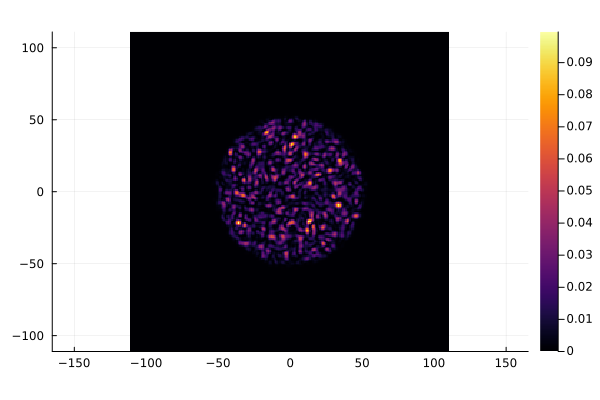

In [6]:
π2 = embed_source(read(data["var4"]),J, enlarge_factor);
#heatmap(x,y,π2[:,:,J[3]÷2], aspectratio=1)
∇2 = embed_source(read(data["var5"]),J, enlarge_factor);
#heatmap(x,y,∇2[:,:,J[3]÷2], aspectratio=1)
V = embed_source(read(data["var6"]),J, enlarge_factor);
heatmap(x,y,V[:,:,J[3]÷2], aspectratio=1)

#heatmap(π2[:,:,(J[3]+1)÷2])

In [7]:
n_fields = 4 # the field and its derivative 
u = zeros(n_fields,J...)
du = similar(u)
d2 = zeros(2,J...);
#dxu = similar(u);
#dyu = similar(u);
#dzu = similar(u);

In [33]:
T = 200
data_step = 10 #place where to extract data
int_steps = 100
M = data_step * int_steps + 1
@show dt = T/(M-1)


#v = zeros(n_fields,data_step+1 ,J...)
τ = 1.0 #damping must be positive here
par = (1.0, 1.0, τ) # (a, b, τ)
#par_F = (x,y,z,dxu,dyu,dzu,Dx,Dy,Dz,D2x,D2y,D2z,d2,dx,ρ,J, par)
dxu_x = zeros(2,n_fields,J[2],J[3]); dyu_x = copy(dxu_x); dzu_x = copy(dxu_x)
dxu_y = zeros(2,n_fields,J[1],J[3]); dyu_y = copy(dxu_y); dzu_y = copy(dxu_y)
dxu_z = zeros(2,n_fields,J[1],J[2]); dyu_z = copy(dxu_z); dzu_z = copy(dxu_z)
coors = (x,y,z)
boundary_derivs = (dxu_x,dyu_x,dzu_x,dxu_y,dyu_y,dzu_y,dxu_z,dyu_z,dzu_z)
derivs = (Dx,Dy,Dz,D2x,D2y,D2z)
ρ = 0.01 .*(π2,∇2,V)
par_FCR = (coors,boundary_derivs,derivs,d2,dx,ρ,J,n_fields,par)
norms = zeros(n_fields,M);



dt = T / (M - 1) = 0.2


In [34]:
@show size(u);
@show size(π2)
@show norm(π2)/sqrt(prod(J))

run_name = data_name * "_try_T$(T)"
full_outputs = true
file_name_out = "Results/" * run_name * ".jld2"#* ".h5"
run_pars = Dict("run_name" => run_name, "par_grid" => (Box_x, J,n_fields), "par_evolv" => (T,data_step,int_steps,dt))
save(file_name_out, run_pars)

size(u) = (4, 223, 223, 223)
size(π2) = (223, 223, 223)
norm(π2) / prod(J) = 3.1380304635084077e-6


In [50]:
u[1,:,:,:] .= 1.0
u[2,:,:,:] .= 0.0
u[3,:,:,:] .= 1.0
u[4,:,:,:] .= 0.0

norms[:,1] = get_norms(u)

4-element Vector{Float64}:
 1.0
 0.0
 1.0
 0.0

In [46]:

global t = 0.0
for m in 1:data_step-1
    for mm in 1:int_steps
        RK4_Step!(FCR_Full,u,t,dt,par_FCR)
        global t = t + dt
    end    
    norms[:,m+1] = get_norms(u)
    println("t = $t, m = $m, norm u_1 = $(norms[1,m]) norm u_2 = $(norms[2,m]), norm u_3 = $(norms[3,m]) norm u_4 = $(norms[4,m])")
    #v[:,m+1,:,:,:] = u[:,:,:,:]
    if full_outputs
        local tiempo = @sprintf("%05d", m)
        field_name = "u"
        file = jldopen(file_name_out, "a+") do file
            file[field_name * "/u_$(tiempo)"] = u
      end
    end
end

t = 0.2, m = 1, norm u_1 = 0.0 norm u_2 = 0.0, norm u_3 = 0.0 norm u_4 = 0.0
t = 0.4, m = 2, norm u_1 = 1.000003197189061 norm u_2 = 0.00017870657599000127, norm u_3 = 0.9999903941686369 norm u_4 = 0.0005939750319762733
t = 0.6000000000000001, m = 3, norm u_1 = 1.0000120068439418 norm u_2 = 0.000321668538319652, norm u_3 = 0.9999639571146605 norm u_4 = 0.0010625746692726906
t = 0.8, m = 4, norm u_1 = 1.0000254240951627 norm u_2 = 0.0004331280491047327, norm u_3 = 0.9999237796793039 norm u_4 = 0.0014167870376976682
t = 1.0, m = 5, norm u_1 = 1.000042631546032 norm u_2 = 0.0005177960093707164, norm u_3 = 0.9998723998275812 norm u_4 = 0.0016723137951995851
t = 1.2, m = 6, norm u_1 = 1.0000629634182738 norm u_2 = 0.000580655073632143, norm u_3 = 0.9998118923390178 norm u_4 = 0.0018481800488692713
t = 1.4, m = 7, norm u_1 = 1.0000858767215977 norm u_2 = 0.0006266186892553456, norm u_3 = 0.9997439476330544 norm u_4 = 0.001964561180933597
t = 1.5999999999999999, m = 8, norm u_1 = 1.0001109280

In [48]:
norms

4×11 Matrix{Float64}:
 0.0  1.0          1.00001      1.00003      …  1.00014      1.00017      0.0
 0.0  0.000178707  0.000321669  0.000433128     0.000684992  0.000703946  0.0
 0.0  0.99999      0.999964     0.999924        0.999591     0.999508     0.0
 0.0  0.000593975  0.00106257   0.00141679      0.00209116   0.00212803   0.0

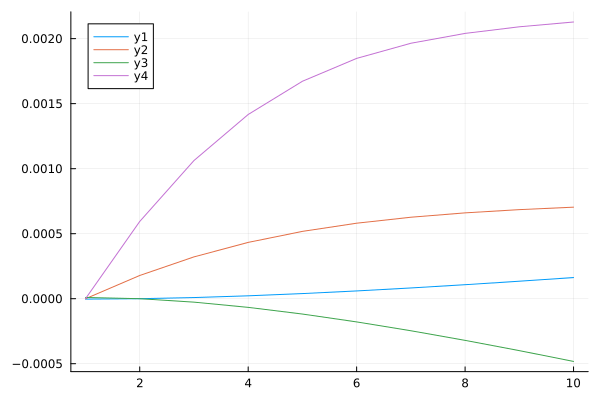

In [51]:
plot(norms[1,1:end-1].-norms[1,2])
plot!(norms[2,1:end-1])
plot!(norms[3,1:end-1] .-norms[3,2])
plot!(norms[4,1:end-1])

In [ ]:
anim = @animate for i ∈ 1:1:M
    surface(v[1,i,:,:,(J[3]+1)÷2],aspectratio=1)
end

gif(anim, "carlos_phi_e.gif", fps = 10)